In [1]:
!pip install kmodes

In [2]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [6]:
file=r'C:\Users\chirag\Desktop\ML IITK\Unsupervised Learning\DATA\bank-full.csv'

data=pd.read_csv(file,delimiter=';')

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
data.previous.value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [9]:
cat_data=data.select_dtypes(['object']).drop(['y'],1)

C:\Users\chirag\AppData\Local\Temp/ipykernel_8956/1810275439.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  cat_data=data.select_dtypes(['object']).drop(['y'],1)


In [10]:
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lb=LabelEncoder()

In [13]:
cat_data_encoded=cat_data.apply(lb.fit_transform)

In [14]:
cat_data_encoded.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,4,1,2,0,1,0,2,8,3
1,9,2,1,0,1,0,2,8,3
2,2,1,1,0,1,1,2,8,3
3,1,1,3,0,1,0,2,8,3
4,11,2,3,0,0,0,2,8,3


In [15]:
cost=[]
for num_clusters in list(range(1,10)):
    kmode=KModes(n_clusters=num_clusters,init="Cao",n_init=1,verbose=1)
    kmode.fit(cat_data_encoded)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 159248.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4801, cost: 132489.0
Run 1, iteration: 2/100, moves: 982, cost: 132489.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7324, cost: 124617.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7127, cost: 122274.0
Run 1, iteration: 2/100, moves: 457, cost: 122274.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9407, cost: 116926.0
Run 1, iteration: 2/100, moves: 402, cost: 116926.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9928, cost: 114179.0
Run 1, iteration: 2/100, moves: 591, cost: 114179

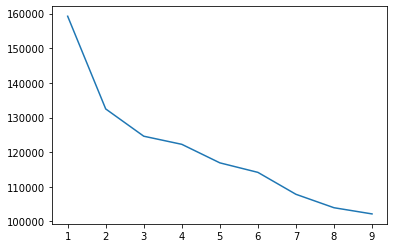

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
y=np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [18]:
km=KModes(n_clusters=3,init="Cao",n_init=1,verbose=1)
cluster_labels=km.fit_predict(cat_data_encoded)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7324, cost: 124617.0


In [19]:
cat_data['cluster']=cluster_labels

In [20]:
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,cluster
0,management,married,tertiary,no,yes,no,unknown,may,unknown,0
1,technician,single,secondary,no,yes,no,unknown,may,unknown,0
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,0
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,0
4,unknown,single,unknown,no,no,no,unknown,may,unknown,1


In [21]:
cat_data['cluster'].value_counts()

0    27642
1    10388
2     7181
Name: cluster, dtype: int64

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='job', ylabel='count'>

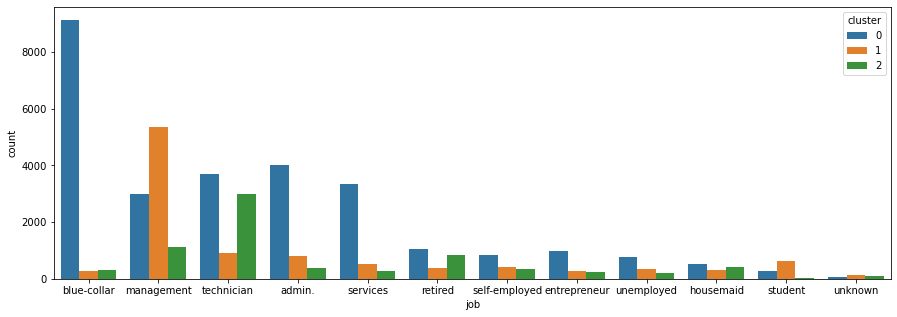

In [24]:
var='job'
plt.subplots(figsize=(15,5))
sns.countplot(x=cat_data[var],
             order=cat_data[var].value_counts().index,
             hue=cat_data['cluster'])

# Considering noth numeric and categorical features together

In [25]:
mixed_data=data.drop(['y'],1)

C:\Users\chirag\AppData\Local\Temp/ipykernel_8956/2898818760.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  mixed_data=data.drop(['y'],1)


In [29]:
mixed_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [26]:
mixed_data_cats=[True if _ in cat_data.columns else False for _ in mixed_data.columns]

In [31]:
cat_col_indices=list(np.arange(mixed_data.shape[1])[mixed_data_cats])

In [32]:
cost=[]
for num_clusters in list(range(1,10)):
    kp=KPrototypes(n_clusters=num_clusters,n_init=1,verbose=1,max_iter=5)
    kp.fit(mixed_data,categorical=cat_col_indices)
    cost.append(kp.cost_)
    print(num_clusters,':',cost[-1])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/5, moves: 0, ncost: 422623278281.57196
1 : 422623278281.57196
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/5, moves: 21454, ncost: 326889708747.25195
Run: 1, iteration: 2/5, moves: 16145, ncost: 235557023262.70688
Run: 1, iteration: 3/5, moves: 3304, ncost: 212331592947.2358
Run: 1, iteration: 4/5, moves: 1185, ncost: 205678490368.0093
Run: 1, iteration: 5/5, moves: 569, ncost: 203124534335.9075
2 : 203124534335.9075
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/5, moves: 5193, ncost: 177111085140.07086
Run: 1, iteration: 2/5, moves: 4853, ncost: 1501902

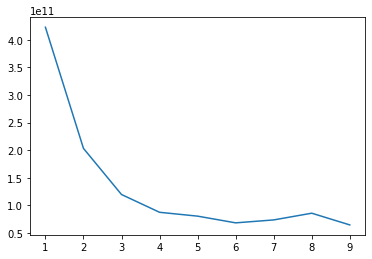

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
y=np.array([i for i in range(1,10,1)])
plt.plot(y,cost)